<br><br>
<a id='Header' style="font-size:35px; color:#1D2951; text-decoration:none; text-align:center;"><center><b>X | Case Study | Data Anaylst</b></center></a>
<br/><br/>



<a id='Header' style="font-size:30px; color:#1D2951; text-decoration:none">
    <b> Table of Contents </b>
</a> 
<ul>
<li><a href="#intro" style="font-size:15px; color:#1D2951">Introduction</a></li>
<li><a href="#dataset" style="font-size:15px; color:#1D2951">Dataset Overview</a></li>    
<li><a href="#opa" style="font-size:15px; color:#1D2951">Operations Analysis</a></li>

<li><a href="#Q1" style="font-size:15px; color:#1D2951">1. Analysis of Accumulation Transactions and Accumulated Value per SKU</a></li>
<li><a href="#Q2" style="font-size:15px; color:#1D2951">2. Total Volume in Liters Sold per SKU</a></li>
<li><a href="#Q3" style="font-size:15px; color:#1D2951">3. Monthly Trends in Accumulation Transactions and Accumulated Value - MoM</a></li>
<li><a href="#Q4" style="font-size:15px; color:#1D2951">4. Comparative Analysis of Top and Bottom Merchants by Redemption Transactions and Redeemed Value</a></li>
<li><a href="#Q5" style="font-size:15px; color:#1D2951">5. Segmentation of Wallets Based on Accumulated Products: Fuel, Lubes, and Mixed</a></li>
<li><a href="#Q6" style="font-size:15px; color:#1D2951">6. Wallet Segmentation Based on Vehicle Type: Commercial, Passenger, and Mixed Categories</a></li>
<li><a href="#Q7" style="font-size:15px; color:#1D2951">7. Percentage of Mixed Fuel & Lubes and PV & CV Wallets</a></li>
<li><a href="#Q8" style="font-size:15px; color:#1D2951">8. Daily Running Total Analysis of Wallet Points: Additions, Deductions, and Net Balance</a></li>

<li><a href="#conc" style="font-size:15px; color:#1D2951">Conclusion</a></li>



---

<a id='intro' style="font-size:25px; color:#1D2951; text-decoration:none"><b>Introduction</b></a>

In this report, we will be looking into a dataset from an oil & gas company to explore customer behavior and key performance indicators (KPIs) pivotal to the industry. Our analysis aims to uncover insights into how customers interact with the company’s offerings, particularly in terms of fuel and lubricant transactions. The data spans various dimensions, from transactional logs to wallet points, SKU details, and vehicle types.
    
Key metrics we will focus on include:

**1. Accumulation Transactions and Value Per SKU:** We will assess the frequency and value of points accumulated for each SKU, providing insights into product popularity and customer engagement.

**2. Volume Sold Per SKU:** This metric will help us quantify the total volume of products sold, giving us a measure of product demand.

**3. Month-over-Month Trends:** By examining the accumulation transactions and accumulated values on a monthly basis, we will identify trends and patterns in customer behavior and program effectiveness.

**4. Merchant Analysis:** We will identify the top and bottom merchants by redemption transactions and values to understand merchant performance.

**5. Wallet Segmentation:** We will segment customer wallets based on their transaction types—whether they are exclusively for fuel, lubes, or a mix of both.

**6. Vehicle Type Segmentation:** We will also segment transactions by vehicle types—commercial or passenger—to gain insights into different market segments.

**7. Mixed Wallet Analysis:** We will calculate the percentage of wallets that are mixed in terms of fuel and lubes as well as PV and CV, highlighting the diversity within the customer base.

**8. Wallet Balance Trends:** Finally, we will track the day-by-day wallet points balance, showing points redemption patterns.


For the rest of the notebook, we will be heavily using `pandas` and `pandasql (SQLite)`.

In [1]:
from pandasql import sqldf
import pandasql as ps
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [3]:
plt.style.use('seaborn-deep')
%matplotlib inline

---

<a id='dataset' style="font-size:25px; color:#1D2951; text-decoration:none"><b>Dataset Overview</b></a>

In [4]:
# load datasets

branch_df = pd.read_csv("Case Study - O&G - Branch - 2022.csv")
category_df = pd.read_csv("Case Study - O&G - Category - 2022.csv")
logtype_df = pd.read_csv("Case Study - O&G - LogType - 2022.csv")
merchant_df = pd.read_csv("Case Study - O&G - Merchant - 2022.csv")
pointslog_df = pd.read_csv("Case Study - O&G - PointsLog - 2022.csv")
skucategory_df = pd.read_csv("Case Study - O&G - SKUCategory - 2022.csv")
skupoints_df = pd.read_csv("Case Study - O&G - SKUPoints - 2022.csv")
transaction_df = pd.read_csv("Case Study - O&G - Transaction - 2022.csv")
transactiontype_df = pd.read_csv("Case Study - O&G - TransactionType - 2022.csv")
wallet_df = pd.read_csv("Case Study - O&G - Wallet - 2022.csv")
pv_cv_df = pd.read_csv("PV CV Sheet.csv")

**Overview of All tables Columns**

In [5]:
mx_list_size = 10
column_dict = {
    'branch_df': list(branch_df.columns) + ['-'] * (mx_list_size - len(branch_df.columns)),
    'category_df': list(category_df.columns) + ['-'] * (mx_list_size - len(category_df.columns)),
    'logtype_df': list(logtype_df.columns) + ['-'] * (mx_list_size - len(logtype_df.columns)),
    'merchant_df': list(merchant_df.columns) + ['-'] * (mx_list_size - len(merchant_df.columns)),
    'pointslog_df': list(pointslog_df.columns) + ['-'] * (mx_list_size - len(pointslog_df.columns)),
    'skucategory_df': list(skucategory_df.columns) + ['-'] * (mx_list_size - len(skucategory_df.columns)),
    'skupoints_df': list(skupoints_df.columns) + ['-'] * (mx_list_size - len(skupoints_df.columns)),
    'transaction_df': list(transaction_df.columns) + ['-'] * (mx_list_size - len(transaction_df.columns)),
    'transactiontype_df': list(transactiontype_df.columns) + ['-'] * (mx_list_size - len(transactiontype_df.columns)),
    'wallet_df': list(wallet_df.columns) + ['-'] * (mx_list_size - len(wallet_df.columns)),
    'pv_cv_df': list(pv_cv_df.columns) + ['-'] * (mx_list_size - len(pv_cv_df.columns))
}

dataset_columns_overview = pd.DataFrame.from_dict(column_dict)
dataset_columns_overview

,branch_df,category_df,logtype_df,merchant_df,pointslog_df,skucategory_df,skupoints_df,transaction_df,transactiontype_df,wallet_df,pv_cv_df
0,BranchId,CategoryId,LogType_Id,MerchantId,Id,SKU_Category_Id,SKU_Id,TransactionId,TransactionTypeId,Id,Name
1,Branch_Name,CategoryName,LogType,Merchant_Name,WalletId,SKU_Category_Name,SKU_Name,WalletId,TransactionType,TotalPoints,CV/PV
2,MerchantId,-,IsAccumlation,CategoryId,LogTypeId,-,Value,CreatedDatetime,-,OptedInDate,-
3,-,-,-,-,Points,-,SKU_Category_Id,MerchantId,-,WalletStatusId,-
4,-,-,-,-,CreatedDate,-,-,BranchId,-,-,-
5,-,-,-,-,ExpiryDate,-,-,TransactionTypeId,-,-,-
6,-,-,-,-,SkuId,-,-,Points,-,-,-
7,-,-,-,-,-,-,-,PointsValue,-,-,-
8,-,-,-,-,-,-,-,BillTotal,-,-,-
9,-,-,-,-,-,-,-,-,-,-,-


**Constants**

In [6]:
REDEMPTION_FACTOR = 0.02


---

In [7]:
pointslog_df.head(2)

,Id,WalletId,LogTypeId,Points,CreatedDate,ExpiryDate,SkuId
0,5425107,643782,11,0,2022-01-01 00:08:48.247,2024-01-01 00:08:48.243,NaN
1,5425108,643782,2,250,2022-01-01 00:08:48.263,2024-01-01 00:08:48.263,1.0


In [8]:
skupoints_df.head(2)

,SKU_Id,SKU_Name,Value,SKU_Category_Id
0,1,Gas 95,250.0,1
1,5,MDELVAC 1 SHC 5W40 PAIL 20L :EG,1.0,2


In [9]:
pv_cv_df['CV/PV'].value_counts()

Passenger Vehicle     26
Commercial Vehicle    18
AS                     9
Other                  8
Name: CV/PV, dtype: int64

In [10]:
category_df.head(2)

,CategoryId,CategoryName
0,2,Jewelry
1,6,Electronics


In [11]:
pointslog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747904 entries, 0 to 747903
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           747904 non-null  int64  
 1   WalletId     747904 non-null  int64  
 2   LogTypeId    747904 non-null  int64  
 3   Points       747904 non-null  int64  
 4   CreatedDate  747904 non-null  object 
 5   ExpiryDate   730366 non-null  object 
 6   SkuId        576471 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 39.9+ MB


In [12]:
pointslog_df['SkuId'].isnull().sum()

171433

In [13]:
# pointslog_df['SkuId'] = pointslog_df['SkuId'].astype(str)
# logtype_df['LogType_Id'] = logtype_df['LogType_Id'].astype(str)
# skupoints_df[['SKU_Id', 'SKU_Category_Id']] = skupoints_df[['SKU_Id', 'SKU_Category_Id']].astype(str)

In [14]:
# Convert 'CreatedDate' and 'ExpiryDate' to datetime objects
pointslog_df['CreatedDate'] = pd.to_datetime(pointslog_df['CreatedDate'])
pointslog_df['ExpiryDate'] = pd.to_datetime(pointslog_df['ExpiryDate'])

transaction_df['CreatedDatetime'] = pd.to_datetime(transaction_df['CreatedDatetime'])

In [15]:
pointslog_df['CreatedDate'].min()

Timestamp('2022-01-01 00:08:48.247000')

In [16]:
pointslog_df['CreatedDate'].max()

Timestamp('2022-08-11 16:29:57.307000')

In [17]:
# rename the col
pv_cv_df.rename(columns={'CV/PV': 'CV_PV'}, inplace=True)

<!-- pv_cv_names - sku_names:
    
MOBIL X4 50 PAIL 16L:EG LOY
MOBIL X4 50 PAIL 20L:EG LOY
MOBIL X4 50 GSP 4X5L:EG LOY

MOBIL X4 50 PAIL 16L :EG
MOBIL X4 50 PAIL 20L :EG
MOBIL X4 50 GSP 4X5L :EG -->

<!-- # # Find similar values

# from fuzzywuzzy import fuzz

# threshold = 80

# similar_values = []
# for val1 in missing_names_df['Missing_Names']:
#     for val2 in pv_cv_df['Cleaned_Name']:
#         similarity = fuzz.partial_ratio(val1, val2)
#         if similarity >= threshold:
#             similar_values.append((val1, val2, similarity))

# print("Similar values between missing_names_df['Missing_Names'] and pv_cv_df['cleaned_name']:")
# for val1, val2, similarity in similar_values:
#     print(f"{val1} | {val2} | Similarity: {similarity}%") -->

---

<a id='opa' style="font-size:25px; color:#1D2951; text-decoration:none"><b>Operations Analysis</b></a>

<a id='Q1' style="font-size:18px; color:#1D2951; text-decoration:none"><b> 1. Analysis of Accumulation Transactions and Accumulated Value per SKU </b></a>

#### SQL Query:

In [18]:
sql_query = """
            SELECT sp.SKU_Id,
                   sp.SKU_Name,
                   COUNT(pl.Id) AS number_of_transactions,
                   SUM(pl.Points) AS total_points,
                   SUM(pl.Points) * 0.02 AS accumulated_value  -- multiply by redemption factor is 0.02
            
            FROM pointslog_df pl
            JOIN skupoints_df sp ON pl.SkuId = sp.SKU_Id
            
            WHERE pl.LogTypeId IN (SELECT LogType_Id FROM logtype_df WHERE IsAccumlation = '1')
            GROUP BY 1,2
            ORDER BY 3 DESC

            """

result_df_q1 = pysqldf(sql_query)
result_df_q1

,SKU_Id,SKU_Name,number_of_transactions,total_points,accumulated_value
0,1,Gas 95,262816,65704000,1314080.00
1,11,M-DELVAC 1350 PAIL 20L :EG,43844,28630132,572602.64
2,7,M-DELVAC MX III 20W50 GSP 4X5L AME-1 :EG,36899,9593740,191874.80
3,8,M-DELVAC MX III 20W50 PAIL 20L :EG,35901,36439515,728790.30
4,10,M-DELVAC 1350 GSP 4X5L LCL :EG,35140,5938660,118773.20
5,28,MOBIL SUPER 15W-50 GSP 4X5L :EG PROMO,29823,10587165,211743.30
6,24,MOBIL SPL 20W50 GSP 4X4L AME-1 :EG,24193,4233775,84675.50
7,21,M-1 X1 5W30 GSP 4X4L AME-1 :EG*,9621,13854240,277084.80
8,13,MOBIL X3 50 PAIL 20L :EG,8472,5176392,103527.84
9,22,MOBIL SUPER 15W-50 GSP 4X4L :EG,7678,2725690,54513.80


In [19]:
# export to CSV
# result_df_q1.to_csv('result_df_q1.csv', index=False)

#### Python Code:

In [20]:
accumulation_logtype_ids = logtype_df[logtype_df['IsAccumlation'] == 1]['LogType_Id'].tolist()

In [21]:
merged_df = pd.merge(pointslog_df, skupoints_df, left_on='SkuId', right_on='SKU_Id', how='inner')

accumulation_df = merged_df[merged_df['LogTypeId'].isin(accumulation_logtype_ids)]

result_df = accumulation_df.groupby(['SKU_Id', 'SKU_Name']).agg(
                                                                number_of_transactions=('Id', 'count'),
                                                                total_points=('Points', 'sum')).reset_index()

# accumulated value including the redemption factor
result_df['accumulated_value'] = result_df['total_points'] * REDEMPTION_FACTOR  # APPLYING the redemption factor

result_df

,SKU_Id,SKU_Name,number_of_transactions,total_points,accumulated_value
0,1,Gas 95,262816,65704000,1314080.00
1,5,MDELVAC 1 SHC 5W40 PAIL 20L :EG,1236,4573200,91464.00
2,6,M-DELVAC 1 SHC 5W40 4X5L :EG*,3360,3158400,63168.00
3,7,M-DELVAC MX III 20W50 GSP 4X5L AME-1 :EG,36899,9593740,191874.80
4,8,M-DELVAC MX III 20W50 PAIL 20L :EG,35901,36439515,728790.30
5,9,M-DELVAC MX 15W40 PAIL 20L :EG,230,184690,3693.80
6,10,M-DELVAC 1350 GSP 4X5L LCL :EG,35140,5938660,118773.20
7,11,M-DELVAC 1350 PAIL 20L :EG,43844,28630132,572602.64
8,12,MOBIL X3 50 GSP 4X5L :EG,6225,983550,19671.00
9,13,MOBIL X3 50 PAIL 20L :EG,8472,5176392,103527.84


#### Visualization:

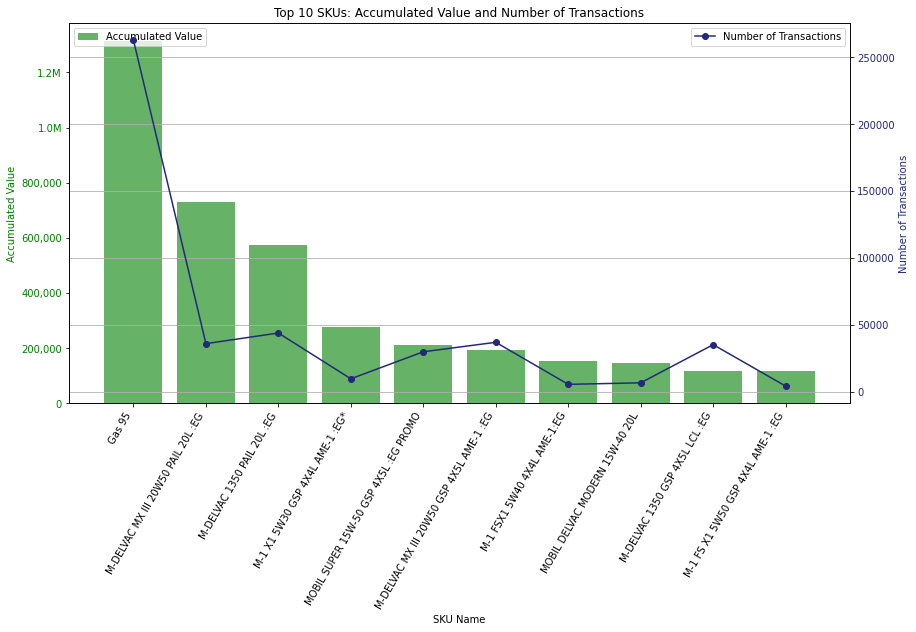

In [22]:
# top 10 skus
top_skus = result_df.sort_values(by='accumulated_value', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(14, 7))

plt.xticks(rotation=60, ha='right')

# Plotting accumulated value as a bar chart on the primary y-axis
ax1.bar(top_skus['SKU_Name'], top_skus['accumulated_value'], color='green', alpha=0.6, label='Accumulated Value')
ax1.set_xlabel('SKU Name')
ax1.set_ylabel('Accumulated Value', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Format the primary y-axis to display values in millions if they are large enough
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) if x < 1e6 else "{:.1f}M".format(x*1e-6)))

# Creating a secondary y-axis for number of transactions
ax2 = ax1.twinx()
ax2.plot(top_skus['SKU_Name'], top_skus['number_of_transactions'], color='#23297A', marker='o', label='Number of Transactions')
ax2.set_ylabel('Number of Transactions', color='#23297A')
ax2.tick_params(axis='y', labelcolor='#23297A')

plt.title('Top 10 SKUs: Accumulated Value and Number of Transactions')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.show()

In [23]:
total_accumulated_value = result_df['accumulated_value'].sum()

top_3_skus = top_skus.head(3)
top_3_skus['percentage_of_total'] = top_3_skus['accumulated_value'] / total_accumulated_value * 100

for index, row in top_3_skus.iterrows():
    print(f"SKU {row['SKU_Name']} contributes {row['percentage_of_total']:.2f}% to the total accumulated value.")

SKU Gas 95 contributes 29.07% to the total accumulated value.
SKU M-DELVAC MX III 20W50 PAIL 20L :EG contributes 16.12% to the total accumulated value.
SKU M-DELVAC 1350 PAIL 20L :EG contributes 12.67% to the total accumulated value.


This shows that the top three SKUs:
`Gas 95`, `M-DELVAC MX III 20W50 PAIL 20L:EG`, and `M-DELVAC 1350 PAIL 20L:EG`, 
significantly drive the accumulated value, demonstrating the focused customer preference and potential areas for strategic emphasis

---

<a id='Q2' style="font-size:18px; color:#1D2951; text-decoration:none"><b> 2. Total Volume in Liters Sold per SKU</b></a>

#### SQL Query:

In [24]:
query = '''
         SELECT sp.SKU_Id,
                sp.SKU_Name,
                SUM(pl.Points) AS total_points, 
                SUM(pl.Points) / 10 AS total_volume_in_liters, -- converting points to liters, assuming 1 point equals 0.1 liters
                (SUM(pl.Points) / 250) * 25 AS total_volume_in_liters_  -- assuming each 250 points is at least 25 liters
        
        FROM pointslog_df pl
        JOIN skupoints_df sp ON pl.SkuId = sp.SKU_Id
        
     --   WHERE pl.LogTypeId IN (SELECT LogType_Id FROM logtype_df WHERE IsAccumlation = 1)
        GROUP BY 1,2

        '''

result_df_q2 = ps.sqldf(query)
result_df_q2

,SKU_Id,SKU_Name,total_points,total_volume_in_liters,total_volume_in_liters_
0,1,Gas 95,65704000,6570400,6570400
1,5,MDELVAC 1 SHC 5W40 PAIL 20L :EG,4573200,457320,457300
2,6,M-DELVAC 1 SHC 5W40 4X5L :EG*,3158400,315840,315825
3,7,M-DELVAC MX III 20W50 GSP 4X5L AME-1 :EG,9593740,959374,959350
4,8,M-DELVAC MX III 20W50 PAIL 20L :EG,36439515,3643951,3643950
5,9,M-DELVAC MX 15W40 PAIL 20L :EG,184690,18469,18450
6,10,M-DELVAC 1350 GSP 4X5L LCL :EG,5938660,593866,593850
7,11,M-DELVAC 1350 PAIL 20L :EG,28630132,2863013,2863000
8,12,MOBIL X3 50 GSP 4X5L :EG,983550,98355,98350
9,13,MOBIL X3 50 PAIL 20L :EG,5176392,517639,517625


#### Estimating Total Volume in Liters Sold Per SKU:
We use two methods to estimate the total volume sold per SKU, based on the points data:
1. **Direct Conversion**: Here, 1 point is assumed to equal 0.1 liters. This is a standard, straightforward estimation.
2. **Conservative Estimate**: In line with the case study details, we assume that every 250 points (especially for Gas 95 transactions) represent 25 liters. This approach aligns with the specific scenario described for Gas 95 refueling.

We applied two distinct approaches to estimate the total volume sold per SKU. The first method uses a direct conversion where each point equals 0.1 liters, offering a standard, uniform calculation. The second method, based on the guidlines provided, which assumes every 250 points represent 25 liters, particularly applicable to Gas 95 transactions, will not yield exactly how many liters are consumed as the 250 points could mean 25 liters or more.

In [25]:
# export to CSV
# result_df_q2.to_csv('result_df_q2.csv', index=False)

#### Python Code:

In [26]:
merged_df = pd.merge(pointslog_df, skupoints_df, left_on='SkuId', right_on='SKU_Id')

# calculate the total volume in liters assuming 1 point equals 0.1 liters
merged_df['total_volume_in_liters'] = merged_df['Points'] / 10  # Use the points to estimate volume

# calculate the total volume in liters with another way
# merged_df['total_volume_in_liters_2'] = (merged_df['Points'] // 250) * 25


result_df_q2 = merged_df.groupby(['SKU_Id', 'SKU_Name']).agg(
                                                    total_points=('Points', 'sum'),
                                                    total_volume_in_liters=('total_volume_in_liters', 'sum')).reset_index()

result_df_q2

,SKU_Id,SKU_Name,total_points,total_volume_in_liters
0,1,Gas 95,65704000,6570400.0
1,5,MDELVAC 1 SHC 5W40 PAIL 20L :EG,4573200,457320.0
2,6,M-DELVAC 1 SHC 5W40 4X5L :EG*,3158400,315840.0
3,7,M-DELVAC MX III 20W50 GSP 4X5L AME-1 :EG,9593740,959374.0
4,8,M-DELVAC MX III 20W50 PAIL 20L :EG,36439515,3643951.5
5,9,M-DELVAC MX 15W40 PAIL 20L :EG,184690,18469.0
6,10,M-DELVAC 1350 GSP 4X5L LCL :EG,5938660,593866.0
7,11,M-DELVAC 1350 PAIL 20L :EG,28630132,2863013.2
8,12,MOBIL X3 50 GSP 4X5L :EG,983550,98355.0
9,13,MOBIL X3 50 PAIL 20L :EG,5176392,517639.2


#### Visualization:

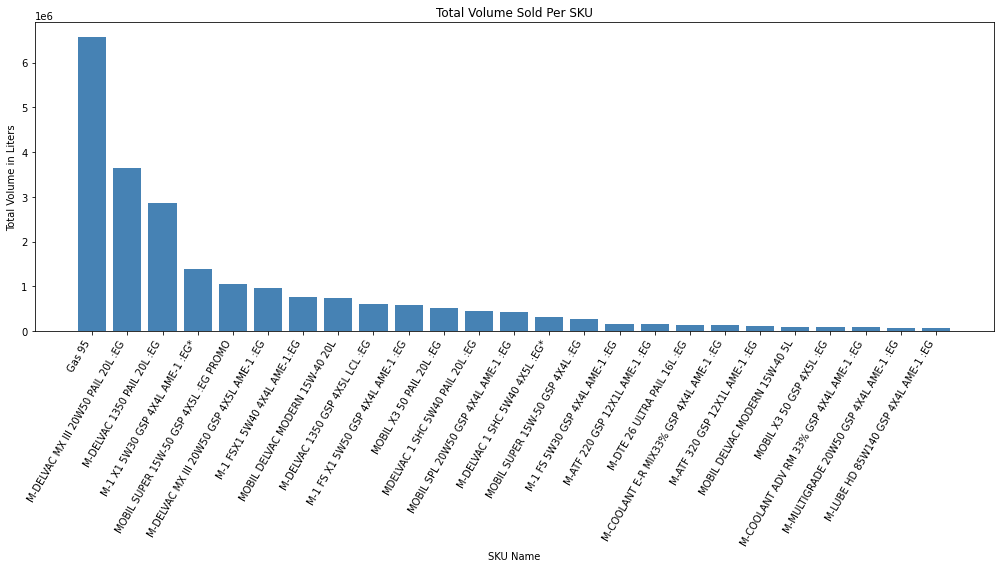

In [27]:
# Sorting the DataFrame and selecting the top 25 SKUs
result_df_sorted = result_df_q2.sort_values('total_volume_in_liters', ascending=False).head(25)

plt.figure(figsize=(14, 8))
plt.bar(result_df_sorted['SKU_Name'], result_df_sorted['total_volume_in_liters'], color='#4682b4')
plt.xlabel('SKU Name')
plt.xticks(rotation=60, ha='right')  # Rotate and align the x-axis labels
plt.ylabel('Total Volume in Liters')
plt.title('Total Volume Sold Per SKU')
plt.tight_layout()  
plt.show()

In [28]:
total_volume_sold = result_df_q2['total_volume_in_liters'].sum()

top_3_skus_volume = result_df_q2.sort_values(by='total_volume_in_liters', ascending=False).head(3)
top_3_skus_volume['percentage_of_total_volume'] = top_3_skus_volume['total_volume_in_liters'] / total_volume_sold * 100

for index, row in top_3_skus_volume.iterrows():
    print(f"SKU {row['SKU_Name']} contributes {row['percentage_of_total_volume']:.2f}% to the total volume sold in liters.")


SKU Gas 95 contributes 29.07% to the total volume sold in liters.
SKU M-DELVAC MX III 20W50 PAIL 20L :EG contributes 16.12% to the total volume sold in liters.
SKU M-DELVAC 1350 PAIL 20L :EG contributes 12.67% to the total volume sold in liters.


The top three SKUs in terms of volume sold demonstrate a significant portion of the total volume, indicating focused consumer preference in these specific products.

`Gas 95` is the highest volume sold by far. This can provide insights into consumer preferences or the effectiveness of the points system in driving sales.

---

<a id='Q3' style="font-size:18px; color:#1D2951; text-decoration:none"><b>3. Monthly Trends in Accumulation Transactions and Accumulated Value - MoM</b></a>

#### SQL Query:

In [29]:
sql_query = """
            SELECT strftime('%Y-%m', CreatedDate) AS month,
                   COUNT(pl.Id) AS number_of_transactions, -- accumulation_txn_count
                   SUM(pl.Points) AS total_points,
                   SUM(pl.Points) * 0.02 AS accumulated_value  -- multiply by redemption factor is 0.02
            
            FROM pointslog_df pl
            
            WHERE pl.LogTypeId IN (SELECT LogType_Id FROM logtype_df WHERE IsAccumlation = '1')
            GROUP BY 1

            """

result_df_q3 = pysqldf(sql_query)
result_df_q3

,month,number_of_transactions,total_points,accumulated_value
0,2022-01,56356,12838269,256765.38
1,2022-02,74518,19997460,399949.20
2,2022-03,99128,30559595,611191.90
3,2022-04,96901,31279527,625590.54
4,2022-05,106680,33962654,679253.08
5,2022-06,124749,40383086,807661.72
6,2022-07,130738,42269971,845399.42
7,2022-08,44366,14891419,297828.38


In [30]:
# export to CSV
# result_df_q3.to_csv('result_df_q3.csv', index=False)

#### Python code:

In [31]:
accumulation_df = accumulation_df[accumulation_df['LogTypeId'].isin(accumulation_logtype_ids)] # accumulation_logtype_ids 'Q1'

result_df_q3_ = accumulation_df.groupby(accumulation_df['CreatedDate'].dt.to_period('M')).agg(
    number_of_transactions=('Id', 'count'),
    total_points=('Points', 'sum')
).reset_index()


result_df_q3_['accumulated_value'] = result_df_q3['total_points'] * REDEMPTION_FACTOR

result_df_q3_

,CreatedDate,number_of_transactions,total_points,accumulated_value
0,2022-01,34037,12828419,256765.38
1,2022-02,50004,19994460,399949.20
2,2022-03,76058,30555435,611191.90
3,2022-04,77679,31275997,625590.54
4,2022-05,87077,33960154,679253.08
5,2022-06,103635,40242086,807661.72
6,2022-07,109385,42238171,845399.42
7,2022-08,37608,14887899,297828.38


#### Visualization:

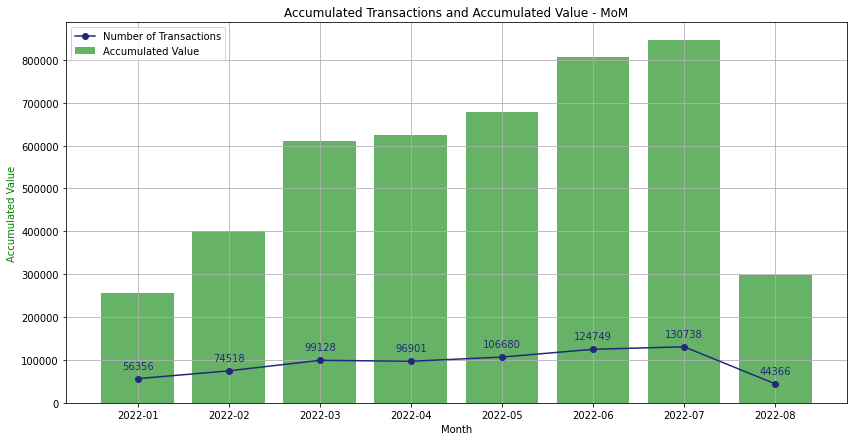

In [32]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Creating the accumulated value as a bar chart on the primary y-axis
ax1.bar(result_df_q3['month'], result_df_q3['accumulated_value'], color='green', alpha=0.6, label='Accumulated Value')
ax1.set_xlabel('Month')
ax1.set_ylabel('Accumulated Value', color='green')

plt.plot(result_df_q3['month'], result_df_q3['number_of_transactions'], color='#23297A', marker='o', label='Number of Transactions')

# Annotate the height of each point
for x, y in zip(result_df_q3['month'], result_df_q3['number_of_transactions']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='#23297A')

# Synchronize y-axes
ax1_max = result_df_q3['accumulated_value'].max()
ax2_max = result_df_q3['number_of_transactions'].max()
ax2_scale_factor = ax1_max / ax2_max
ax2.set_ylim(ax1.get_ylim())

plt.title('Accumulated Transactions and Accumulated Value - MoM')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=0)
plt.grid(True)
plt.show()

The analysis highlights a noticeable increase in both transactions and accumulated value during the summer, especially in June and July. This could be a sign of seasonality trends, possibly linked to summer travel to popular destinations like Sahel or El Gouna. The increase in fuel and gas demand during these months might reflect the higher travel activity. Interestingly, we also need to consider that this trend could be influenced by marketing campaigns attracting new customers, or it might simply be organic growth, this of couse needs a more in depth analysis that could be a potential for a future analysis. It is also important to note that the data for August is only up to the 11th, so it's not complete for the entire month.

In [33]:
# calculating monthly growth rate for accumulated value & number of transactions:

result_df_q3_['accumulated_value'] = result_df_q3_['total_points'] * REDEMPTION_FACTOR

result_df_q3_['accumulated_value_growth'] = result_df_q3_['accumulated_value'].pct_change() * 100
result_df_q3_['transactions_growth'] = result_df_q3_['number_of_transactions'].pct_change() * 100

result_df_q3_

,CreatedDate,number_of_transactions,total_points,accumulated_value,accumulated_value_growth,transactions_growth
0,2022-01,34037,12828419,256568.38,NaN,NaN
1,2022-02,50004,19994460,399889.20,55.860672,46.910715
2,2022-03,76058,30555435,611108.70,52.819506,52.103832
3,2022-04,77679,31275997,625519.94,2.358212,2.131268
4,2022-05,87077,33960154,679203.08,8.582163,12.098508
5,2022-06,103635,40242086,804841.72,18.497949,19.015354
6,2022-07,109385,42238171,844763.42,4.960193,5.548319
7,2022-08,37608,14887899,297757.98,-64.752501,-65.618686


---

<a id='Q4' style="font-size:18px; color:#1D2951; text-decoration:none"><b>4. Comparative Analysis of Top and Bottom Merchants by Redemption Transactions and Redeemed Value</b></a>

#### SQL Query:

In [34]:
# the top 5 merchants by redemption txn:

query = '''
        SELECT m.MerchantId,
               m.Merchant_Name,
               COUNT(t.TransactionId) AS redemption_transactions,
               SUM(t.Points) * 0.02 AS redeemed_value -- Assuming redemption value is points * redemption factor
        
        FROM transaction_df t
        JOIN merchant_df m ON t.MerchantId = m.MerchantId
        
        WHERE t.TransactionTypeId = 1 -- Redemption transactions
        GROUP BY 1,2
        ORDER BY 3 DESC
        LIMIT 5
        '''
top_merchants_txn_df = ps.sqldf(query)
top_merchants_txn_df

,MerchantId,Merchant_Name,redemption_transactions,redeemed_value
0,35,Merchant 35,6427,1391387.8
1,27,Merchant 27,5391,227459.6
2,31,Merchant 31,408,44423.1
3,30,Merchant 30,383,206389.4
4,19,Merchant 19,252,62024.3


In [35]:
# the bottom 5 merchants by redemption txn:

query = '''
        SELECT m.MerchantId,
               m.Merchant_Name,
               COUNT(t.TransactionId) AS redemption_transactions,
               SUM(t.Points) * 0.02 AS redeemed_value -- Assuming redemption value is points * redemption factor
        
        FROM transaction_df t
        JOIN merchant_df m ON t.MerchantId = m.MerchantId
        
        WHERE t.TransactionTypeId = 1 -- Redemption transactions
        GROUP BY 1,2
        ORDER BY 3 
        LIMIT 5
        '''
bottom_merchants_txn_df = ps.sqldf(query)
bottom_merchants_txn_df

,MerchantId,Merchant_Name,redemption_transactions,redeemed_value
0,17,Merchant 17,1,289.0
1,23,Merchant 23,1,925.0
2,32,Merchant 32,1,1.0
3,41,Merchant 41,1,23.0
4,43,Merchant 43,1,5.0


In [36]:
# the top 5 merchants by redeemed_value:

query = '''
        SELECT m.MerchantId,
               m.Merchant_Name,
               COUNT(t.TransactionId) AS redemption_transactions,
               SUM(t.Points) * 0.02 AS redeemed_value -- Assuming redemption value is points * redemption factor
        
        FROM transaction_df t
        JOIN merchant_df m ON t.MerchantId = m.MerchantId
        
        WHERE t.TransactionTypeId = 1 -- Redemption transactions
        GROUP BY 1,2
        ORDER BY 4 DESC
        LIMIT 5
        '''
top_merchants_value_df = ps.sqldf(query)
top_merchants_value_df

,MerchantId,Merchant_Name,redemption_transactions,redeemed_value
0,35,Merchant 35,6427,1391387.8
1,27,Merchant 27,5391,227459.6
2,30,Merchant 30,383,206389.4
3,19,Merchant 19,252,62024.3
4,31,Merchant 31,408,44423.1


In [37]:
# the bottom 5 merchants by redeemed_value:

query = '''
        SELECT m.MerchantId,
               m.Merchant_Name,
               COUNT(t.TransactionId) AS redemption_transactions,
               SUM(t.Points) * 0.02 AS redeemed_value -- Assuming redemption value is points * redemption factor
        
        FROM transaction_df t
        JOIN merchant_df m ON t.MerchantId = m.MerchantId
        
        WHERE t.TransactionTypeId = 1 -- Redemption transactions
        GROUP BY 1,2
        ORDER BY 4 
        LIMIT 5
        '''
bottom_merchants_value_df = ps.sqldf(query)
bottom_merchants_value_df

,MerchantId,Merchant_Name,redemption_transactions,redeemed_value
0,32,Merchant 32,1,1.0
1,43,Merchant 43,1,5.0
2,46,Merchant 46,2,16.0
3,41,Merchant 41,1,23.0
4,51,Merchant 51,2,57.0


#### Python Code:

In [38]:
# Label each df
top_merchants_txn_df['Ranking'] = 'Top_txn'
bottom_merchants_txn_df['Ranking'] = 'Bottom_txn'
top_merchants_value_df['Ranking'] = 'Top_value'
bottom_merchants_value_df['Ranking'] = 'Bottom_value'

# Concat all four DFs
combined_merchants_df = pd.concat([top_merchants_txn_df, bottom_merchants_txn_df,
                                  top_merchants_value_df, bottom_merchants_value_df])


combined_merchants_df.reset_index(drop=True, inplace=True)
combined_merchants_df

,MerchantId,Merchant_Name,redemption_transactions,redeemed_value,Ranking
0,35,Merchant 35,6427,1391387.8,Top_txn
1,27,Merchant 27,5391,227459.6,Top_txn
2,31,Merchant 31,408,44423.1,Top_txn
3,30,Merchant 30,383,206389.4,Top_txn
4,19,Merchant 19,252,62024.3,Top_txn
5,17,Merchant 17,1,289.0,Bottom_txn
6,23,Merchant 23,1,925.0,Bottom_txn
7,32,Merchant 32,1,1.0,Bottom_txn
8,41,Merchant 41,1,23.0,Bottom_txn
9,43,Merchant 43,1,5.0,Bottom_txn


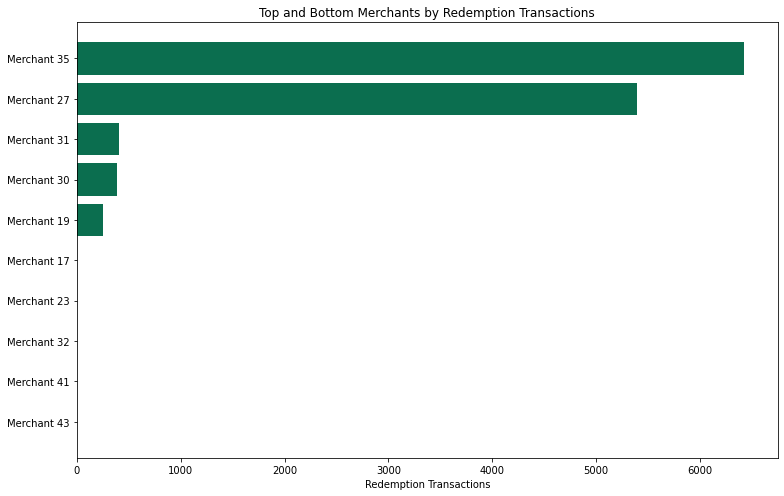

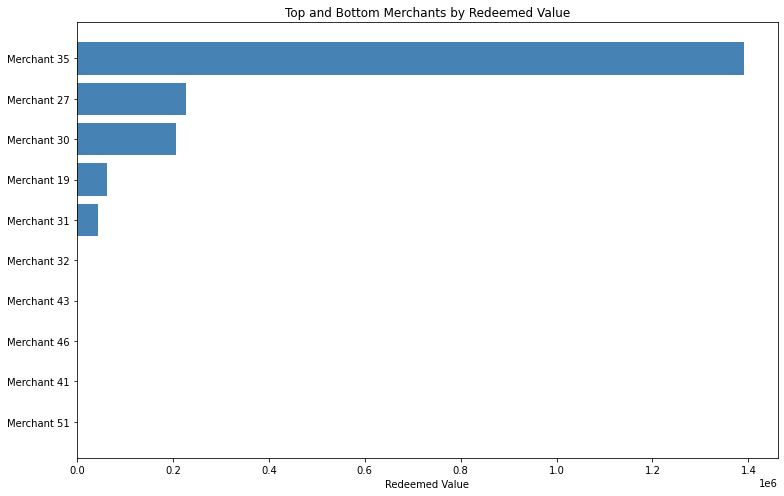

In [39]:
# Concat the top and bottom merchants 
ordered_txn_df = pd.concat([top_merchants_txn_df, bottom_merchants_txn_df])

plt.figure(figsize=(11, 7))
plt.barh(ordered_txn_df['Merchant_Name'], ordered_txn_df['redemption_transactions'], color=ordered_txn_df['Ranking'].map({'Top_txn': '#0b6e4F', 'Bottom_txn': 'red'}))
plt.xlabel('Redemption Transactions')
plt.title('Top and Bottom Merchants by Redemption Transactions')
plt.tight_layout()
plt.gca().invert_yaxis()  
plt.show()


# the same for Redeemed Value
ordered_value_df = pd.concat([top_merchants_value_df, bottom_merchants_value_df])

plt.figure(figsize=(11, 7))
plt.barh(ordered_value_df['Merchant_Name'], ordered_value_df['redeemed_value'], color=ordered_value_df['Ranking'].map({'Top_value': '#4682b4', 'Bottom_value': 'orange'}))
plt.xlabel('Redeemed Value')
plt.title('Top and Bottom Merchants by Redeemed Value')
plt.tight_layout()
plt.gca().invert_yaxis() 
plt.show()


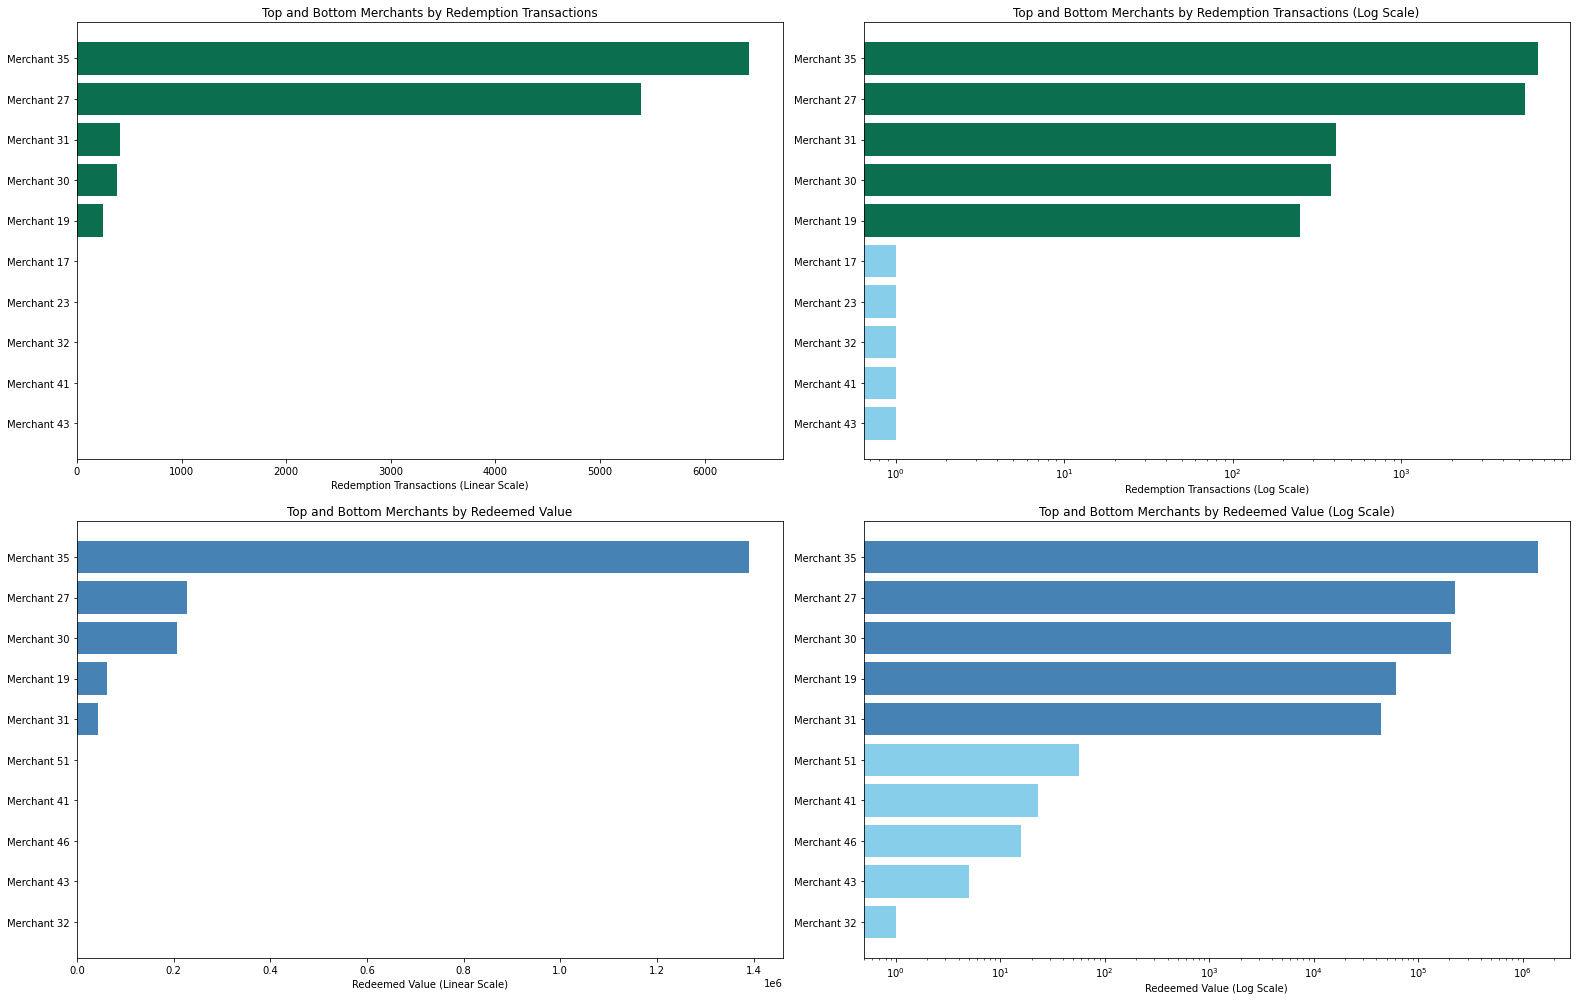

In [40]:
ordered_txn_df_sorted = ordered_txn_df.sort_values('redemption_transactions', ascending=False)
ordered_value_df_sorted = ordered_value_df.sort_values('redeemed_value', ascending=False)

fig, axs = plt.subplots(2, 2, figsize=(22, 14))

# Linear scale for redemption transactions
axs[0, 0].barh(ordered_txn_df_sorted['Merchant_Name'], ordered_txn_df_sorted['redemption_transactions'], 
               color=ordered_txn_df_sorted['Ranking'].map({'Top_txn': '#0b6e4F', 'Bottom_txn': 'skyblue'}))
axs[0, 0].set_xlabel('Redemption Transactions (Linear Scale)')
axs[0, 0].set_title('Top and Bottom Merchants by Redemption Transactions')
axs[0, 0].invert_yaxis()

# Logarithmic scale for redemption transactions
axs[0, 1].barh(ordered_txn_df_sorted['Merchant_Name'], ordered_txn_df_sorted['redemption_transactions'], 
               color=ordered_txn_df_sorted['Ranking'].map({'Top_txn': '#0b6e4F', 'Bottom_txn': 'skyblue'}))
axs[0, 1].set_xlabel('Redemption Transactions (Log Scale)')
axs[0, 1].set_xscale('log')
axs[0, 1].set_title('Top and Bottom Merchants by Redemption Transactions (Log Scale)')
axs[0, 1].invert_yaxis()

# Linear scale for redeemed value
axs[1, 0].barh(ordered_value_df_sorted['Merchant_Name'], ordered_value_df_sorted['redeemed_value'], 
               color=ordered_value_df_sorted['Ranking'].map({'Top_value': '#4682b4', 'Bottom_value': 'skyblue'}))
axs[1, 0].set_xlabel('Redeemed Value (Linear Scale)')
axs[1, 0].set_title('Top and Bottom Merchants by Redeemed Value')
axs[1, 0].invert_yaxis()

# Logarithmic scale for redeemed value
axs[1, 1].barh(ordered_value_df_sorted['Merchant_Name'], ordered_value_df_sorted['redeemed_value'], 
               color=ordered_value_df_sorted['Ranking'].map({'Top_value': '#4682b4', 'Bottom_value': 'skyblue'}))
axs[1, 1].set_xlabel('Redeemed Value (Log Scale)')
axs[1, 1].set_xscale('log')
axs[1, 1].set_title('Top and Bottom Merchants by Redeemed Value (Log Scale)')
axs[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

This visualization highlights the top and bottom 5 merchants based on redemption transactions and redeemed value. Notably, the bottom merchants (labeled as `Bottom_txn` and `Bottom_value`) have significantly lower numbers, as indicated by their transaction counts and values being close to or at 1. As a result the bars is barely existing and not visible in the linear scale, Thus we used the `log10` scale to show include all merchants in the same plot (as shown in the right plot)

The difference between merchants is huge and this illustrates the disparity in merchant performance within the redemption program. this may be point out successful partnerships and customer engagement of the top merchants.

This disparity could point to opportunities for targeted improvements or re-evaluation of certain merchant partnerships.

---

<a id='Q5' style="font-size:18px; color:#1D2951; text-decoration:none"><b>5. Segmentation of Wallets Based on Accumulated Products: Fuel, Lubes, and Mixed</b></a>

#### SQL Query:

In [41]:
query = '''
       SELECT pl.WalletId AS wallet_id,
              CASE WHEN SUM(CASE WHEN sc.SKU_Category_Name = 'Fuel' THEN 1 ELSE 0 END) > 0 
                         AND SUM(CASE WHEN sc.SKU_Category_Name = 'Lubes' THEN 1 ELSE 0 END) = 0 THEN 'Pure Fuel'
                   
                   WHEN SUM(CASE WHEN sc.SKU_Category_Name = 'Fuel' THEN 1 ELSE 0 END) = 0 
                         AND SUM(CASE WHEN sc.SKU_Category_Name = 'Lubes' THEN 1 ELSE 0 END) > 0 THEN 'Pure Lubes'
                   
                   WHEN SUM(CASE WHEN sc.SKU_Category_Name = 'Fuel' THEN 1 ELSE 0 END) > 0 
                         AND SUM(CASE WHEN sc.SKU_Category_Name = 'Lubes' THEN 1 ELSE 0 END) > 0 THEN 'Mixed'           
                   ELSE 'Other' END AS wallet_type
        
        FROM pointslog_df pl
        JOIN skupoints_df sp ON pl.SkuId = sp.SKU_Id
        JOIN skucategory_df sc ON sp.SKU_Category_Id = sc.SKU_Category_Id
        GROUP BY 1

        '''
wallet_types_ = ps.sqldf(query)
wallet_types_

,wallet_id,wallet_type
0,643782,Pure Fuel
1,643783,Pure Fuel
2,643784,Pure Fuel
3,643785,Pure Fuel
4,643786,Pure Fuel
...,...,...
151885,798309,Pure Lubes
151886,798310,Pure Fuel
151887,798311,Pure Lubes
151888,798312,Pure Fuel


In [42]:
# export to CSV
# wallet_types_.to_csv('result_df_q5.csv', index=False)

#### Python code:

In [43]:
def determine_wallet_type(df):
    has_fuel = (df['SKU_Category_Name'] == 'Fuel').any()
    has_lubes = (df['SKU_Category_Name'] == 'Lubes').any()
    if has_fuel and not has_lubes:
        return 'Pure Fuel'
    elif not has_fuel and has_lubes:
        return 'Pure Lubes'
    elif has_fuel and has_lubes:
        return 'Mixed'
    else:
        return 'Other'

In [44]:
merged_df = pd.merge(pointslog_df, skupoints_df, left_on='SkuId', right_on='SKU_Id')
merged_df = pd.merge(merged_df, skucategory_df, on='SKU_Category_Id')

wallet_types = merged_df.groupby('WalletId').apply(determine_wallet_type).reset_index(name='Wallet_Type')
wallet_types

,WalletId,Wallet_Type
0,643782,Pure Fuel
1,643783,Pure Fuel
2,643784,Pure Fuel
3,643785,Pure Fuel
4,643786,Pure Fuel
...,...,...
151885,798309,Pure Lubes
151886,798310,Pure Fuel
151887,798311,Pure Lubes
151888,798312,Pure Fuel


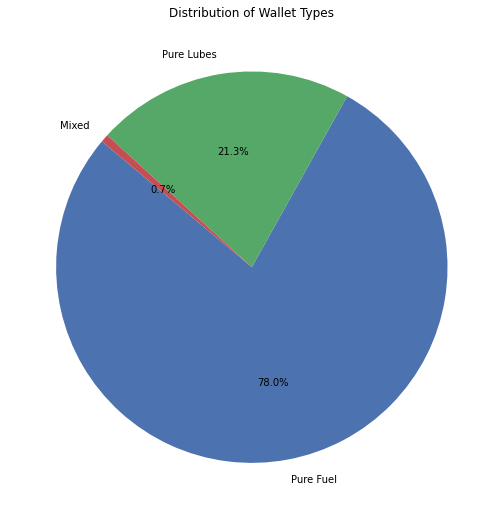

In [45]:
wallet_type_counts = wallet_types['Wallet_Type'].value_counts()
plt.figure(figsize=(9, 9))
plt.pie(wallet_type_counts, labels=wallet_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wallet Types')
plt.show()

In [46]:
wallet_types_['wallet_type'].value_counts()

Pure Fuel     118500
Pure Lubes     32388
Mixed           1002
Name: wallet_type, dtype: int64

In our wallet analysis, we see a clear customer trend. A large majority, about 118,500 wallets, fall under `Pure Fuel`. This tells us that fuel is not just a preference but possibly a necessity for most of our customers. On the other hand, `Pure Lubes` has a dedicated but smaller base of around 32,388 wallets. What's particularly interesting is the `Mixed` category, with only 1,002 wallets, it suggests that diversifying between fuel and lubes is not a common practice among our customers.

These numbers give us a window into our customers' buying habits and preferences. Understanding these patterns is crucial as we strategize our marketing efforts and think about how we can cater to or even expand these distinct segments.

---

<a id='Q6' style="font-size:18px; color:#1D2951; text-decoration:none"><b>6. Wallet Segmentation Based on Vehicle Type: Commercial, Passenger, and Mixed Categories</b></a>

To join both tables `pv_cv_df` and `skupoints_df` using `sku_name` (used as an identifier)
we had to make some tweaks of the available data, such as, trimming whitespace, 
removing extra spaces, colons, dashes, and asterisks. and remove suffixes like `LOY`.



In [47]:
# Cleaning SKU Names:
# standardize names to ensure a correct match for the join operation in question 6
# issues were identified with the SKU names in the 'pv_cv_df' and 'skupoints_df' dataframes.

def clean_sku_name(name):
    """
    cleans and standardizes SKU names by trimming whitespace, 
    removing extra spaces, colons, dashes, and asterisks.
    """
    name = name.strip() 
    name = name.replace(' :', ':').replace(': ', ':')
    name = ' '.join(name.split())
    name = name.replace('-', '').replace('*', '')
    name = name.replace(' LOY', '')
    return name.upper()

pv_cv_df['cleaned_name'] = pv_cv_df['Name'].apply(clean_sku_name)

skupoints_df['cleaned_SKU_name'] = skupoints_df['SKU_Name'].apply(clean_sku_name)

In [48]:
sku_names = set(skupoints_df['cleaned_SKU_name'])
pv_cv_names = set(pv_cv_df['cleaned_name'])


missing_names = sku_names - pv_cv_names

if missing_names:
    print("SKU names from 'skupoints_df' are not present in 'pv_cv_df': ")
    missing_names_df = pd.DataFrame(list(missing_names), columns=['Missing_Names'])
    display(missing_names_df)
else:
    print("All SKU names from 'skupoints_df' are present in 'pv_cv_df' after cleaning.")

SKU names from 'skupoints_df' are not present in 'pv_cv_df': 


,Missing_Names
0,M1 FS 5W40 5L
1,M1 FS 5W30 5L
2,MDELVAC MODERN 20W50 CD III 5L
3,M1 FS X1 5W50 5L
4,MDELVAC MODERN 20W50 CD III 20L
5,M1 ESP 5W30 5L
6,FUEL 95
7,MDELVAC LEGAND 1350 5L
8,GAS 95
9,NUTO H 46 PAIL 16L:EG


#### SQL Query:

In [49]:
query = '''

        WITH wallet_transactions AS 
        (SELECT pl.WalletId, 
                sp.cleaned_SKU_name AS SKU_Name, 
                pvcv.CV_PV
        
        FROM pointslog_df pl
        JOIN skupoints_df sp ON pl.SkuId = sp.SKU_Id
        JOIN pv_cv_df pvcv ON sp.cleaned_SKU_name = pvcv.cleaned_name),

        wallet_segmentation AS
        (SELECT WalletId,
                MAX(CASE WHEN CV_PV = 'Commercial Vehicle' THEN 1 ELSE 0 END) AS has_cv,
                MAX(CASE WHEN CV_PV = 'Passenger Vehicle' THEN 1 ELSE 0 END) AS has_pv
         
         FROM wallet_transactions
         GROUP BY 1)

        SELECT WalletId AS wallet_id,
               CASE WHEN has_cv = 1 AND has_pv = 0 THEN 'Pure Commercial Vehicles (CV)'
                    WHEN has_cv = 0 AND has_pv = 1 THEN 'Pure Passenger Vehicles (PV)'
                    WHEN has_cv = 1 AND has_pv = 1 THEN 'Mixed Wallets'
                    ELSE 'Other' END AS wallet_type
        
        FROM wallet_segmentation
        
        '''
wallet_types_pv_cv = ps.sqldf(query)
wallet_types_pv_cv

,wallet_id,wallet_type
0,643795,Pure Passenger Vehicles (PV)
1,643797,Pure Passenger Vehicles (PV)
2,643895,Pure Commercial Vehicles (CV)
3,643902,Pure Passenger Vehicles (PV)
4,643916,Pure Commercial Vehicles (CV)
...,...,...
33230,798299,Pure Passenger Vehicles (PV)
33231,798300,Mixed Wallets
33232,798309,Pure Passenger Vehicles (PV)
33233,798311,Mixed Wallets


#### Python code:

In [50]:
def classify_wallet(row):
    if row['has_cv'] and not row['has_pv']:
        return 'Pure Commercial Vehicles (CV)'
    elif not row['has_cv'] and row['has_pv']:
        return 'Pure Passenger Vehicles (PV)'
    elif row['has_cv'] and row['has_pv']:
        return 'Mixed Wallets'
    else:
        return 'Other'

In [51]:
# making sure the 'Name' in pv_cv_df is the same format as 'SKU_Name' in skupoints_df
pv_cv_df['Name'] = pv_cv_df['Name'].str.strip()

# JOIN the pointslog_df with skupoints_df to get the SKU names
wallet_transactions = pd.merge(pointslog_df, skupoints_df, left_on='SkuId', right_on='SKU_Id')

# JOIN the result with pv_cv_df to get the vehicle type
wallet_transactions = wallet_transactions.merge(pv_cv_df, left_on='cleaned_SKU_name', right_on='cleaned_name', how='left')


# Group by WalletId and determine the wallet type
wallet_transactions['CV'] = wallet_transactions['CV_PV'] == 'Commercial Vehicle'
wallet_transactions['PV'] = wallet_transactions['CV_PV'] == 'Passenger Vehicle'

wallet_segmentation = wallet_transactions.groupby('WalletId').agg(
                                                    has_cv=('CV', 'max'),
                                                    has_pv=('PV', 'max')).reset_index()

wallet_segmentation['wallet_type'] = wallet_segmentation.apply(classify_wallet, axis=1)

wallet_segmentation

,WalletId,has_cv,has_pv,wallet_type
0,643782,False,False,Other
1,643783,False,False,Other
2,643784,False,False,Other
3,643785,False,False,Other
4,643786,False,False,Other
...,...,...,...,...
151885,798309,False,True,Pure Passenger Vehicles (PV)
151886,798310,False,False,Other
151887,798311,True,True,Mixed Wallets
151888,798312,False,False,Other


In [52]:
# export to CSV
# wallet_segmentation.to_csv('result_df_q6.csv', index=False)

In [53]:
wallet_segmentation_vis = wallet_segmentation[wallet_segmentation['wallet_type'] != 'Other']
wallet_segmentation_vis.head(3)

,WalletId,has_cv,has_pv,wallet_type
13,643795,False,True,Pure Passenger Vehicles (PV)
15,643797,False,True,Pure Passenger Vehicles (PV)
113,643895,True,False,Pure Commercial Vehicles (CV)


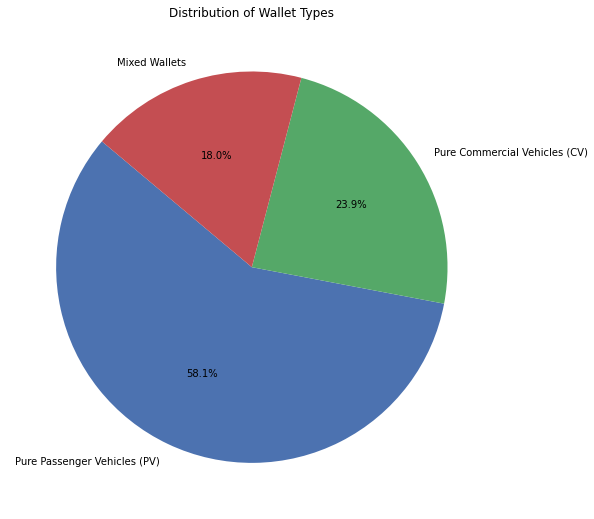

In [54]:
wallet_type_counts = wallet_segmentation_vis['wallet_type'].value_counts()
plt.figure(figsize=(9, 9))
plt.pie(wallet_type_counts, labels=wallet_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wallet Types')
plt.show()

In [55]:
wallet_segmentation_vis['wallet_type'].value_counts()

Pure Passenger Vehicles (PV)     18796
Pure Commercial Vehicles (CV)     7732
Mixed Wallets                     5809
Name: wallet_type, dtype: int64

This shows the breakdown of wallet types among our customers. The majority, 18,796, are `Pure Passenger Vehicles (PV)`, indicating a focus on passenger vehicle-related transactions. `Pure Commercial Vehicles (CV)` account for 7,732 wallets, suggesting a significant interest in commercial vehicle services. Additionally, there are 5,809 `Mixed Wallets`, reflecting customers who engage in transactions for both passenger and commercial vehicles. Understanding these segments can help tailor marketing efforts and services to meet the needs of different customer groups

---

<a id='Q7' style="font-size:18px; color:#1D2951; text-decoration:none"><b>7. Percentage of Mixed Fuel & Lubes and PV & CV Wallets</b></a>

#### SQL:

In [56]:
query = '''
        WITH mixed_wallets_ AS 
          (SELECT wt.wallet_id 
           
           FROM wallet_types_ wt
           JOIN wallet_segmentation ws ON wt.wallet_id = ws.WalletId
           WHERE wt.wallet_type = 'Mixed' AND ws.wallet_type = 'Mixed Wallets'),
           
        total_wallets_ AS
           (SELECT COUNT(DISTINCT WalletId) as total_wallets
            
            FROM pointslog_df)
        SELECT 
            (SELECT COUNT(*) FROM mixed_wallets_) * 100.0 / (SELECT * FROM total_wallets_) as mixed_percentage
        
        '''

mixed_percentage = ps.sqldf(query)
mixed_percentage

,mixed_percentage
0,0.030612


#### Python Code:

In [57]:
mixed_wallets = wallet_types[wallet_types['Wallet_Type'] == 'Mixed'].merge(
    wallet_segmentation[wallet_segmentation['wallet_type'] == 'Mixed Wallets'], left_on='WalletId', right_on='WalletId')

total_wallets = pointslog_df['WalletId'].nunique()
mixed_percentage = len(mixed_wallets) / total_wallets * 100

print(f"Percentage of wallets that are mixed in terms of both fuel & lubes and PV & CV: {mixed_percentage:.2f}%")

Percentage of wallets that are mixed in terms of both fuel & lubes and PV & CV: 0.03%


<!-- import matplotlib.pyplot as plt

# Data for plotting
labels = ['Mixed Wallets', 'Other Wallets']
sizes = [len(mixed_wallets), total_wallets - len(mixed_wallets)]

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Mixed Wallets to Total Wallets')
plt.show()
 -->

---

<a id='Q8' style="font-size:18px; color:#1D2951; text-decoration:none"><b> 8. Daily Running Total Analysis of Wallet Points: Additions, Deductions, and Net Balance </b></a>

#### SQL:

In [58]:
# strftime('%Y-%m-%d', pl.CreatedDate) AS day

query = '''
        WITH daily_transactions AS 
            (SELECT pl.WalletId,
                    strftime('%Y-%m-%d', pl.CreatedDate) AS day,
                    SUM(CASE WHEN lt.IsAccumlation = 1 THEN pl.Points ELSE 0 END) AS points_added, 
                    SUM(CASE WHEN lt.IsAccumlation = 0 THEN pl.Points ELSE 0 END) AS points_deducted
                    
                FROM pointslog_df pl
                JOIN logtype_df lt ON pl.LogTypeId = lt.LogType_Id
                GROUP BY 1,2
            ),
            
        running_total AS 
            (SELECT dt.WalletId,
                    dt.day,
                    SUM(dt.points_added) - SUM(dt.points_deducted) OVER (PARTITION BY dt.WalletId ORDER BY dt.day) AS running_total
                
                FROM daily_transactions dt
                GROUP BY 1,2)

        SELECT  rt.WalletId AS wallet_id,
                rt.day,
                dt.points_added,
                dt.points_deducted,
                rt.running_total
                
        FROM running_total rt
        JOIN daily_transactions dt ON rt.WalletId = dt.WalletId AND rt.day = dt.day
        ORDER BY rt.WalletId, rt.day
        '''

wallet_day_by_day_df = ps.sqldf(query)
wallet_day_by_day_df 

,wallet_id,day,points_added,points_deducted,running_total
0,643782,2022-01-01,250,0,250
1,643783,2022-01-01,250,0,250
2,643783,2022-05-16,250,0,250
3,643784,2022-01-01,250,0,250
4,643785,2022-01-01,250,0,250
...,...,...,...,...,...
404352,798309,2022-08-11,1440,0,1440
404353,798310,2022-08-11,250,0,250
404354,798311,2022-08-11,784,0,784
404355,798312,2022-08-11,250,0,250


In [59]:
# export to CSV
# wallet_day_by_day_df.to_csv('result_df_q8.csv', index=False)

#### Python:

<!-- query = '''
        WITH daily_transactions AS 
            (SELECT pl.WalletId,
                    strftime('%Y-%m-%d', pl.CreatedDate) AS day,
                    SUM(CASE WHEN lt.IsAccumlation = '1' THEN pl.Points ELSE 0 END) AS points_added,
                    SUM(CASE WHEN lt.IsAccumlation = '0' THEN pl.Points ELSE 0 END) AS points_deducted
             
             FROM pointslog_df pl
             JOIN logtype_df lt ON pl.LogTypeId = lt.LogType_Id
             GROUP BY 1,2),
             
        running_total AS 
            (SELECT WalletId,
                    day,
                    SUM(CASE WHEN IsAccumlation = '1' THEN Points ELSE -Points END) OVER (PARTITION BY WalletId ORDER BY day) AS running_total
             
             FROM (
                SELECT pl.WalletId,
                       strftime('%Y-%m-%d', pl.CreatedDate) AS day,
                       lt.IsAccumlation,
                       pl.Points
                       
                FROM pointslog_df pl
                JOIN logtype_df lt ON pl.LogTypeId = lt.LogType_Id) )
                
        SELECT dt.WalletId AS wallet_id,
               dt.day,
               dt.points_added,
               dt.points_deducted,
               rt.running_total
               
        FROM daily_transactions dt
        JOIN running_total rt ON dt.WalletId = rt.WalletId AND dt.day = rt.day
        ORDER BY 1,2
        '''

wallet_day_by_day_df_ = ps.sqldf(query)
wallet_day_by_day_df_
 -->

 **Aggregate Behavior Over Time:** plot the total points added or deducted per day across all wallets

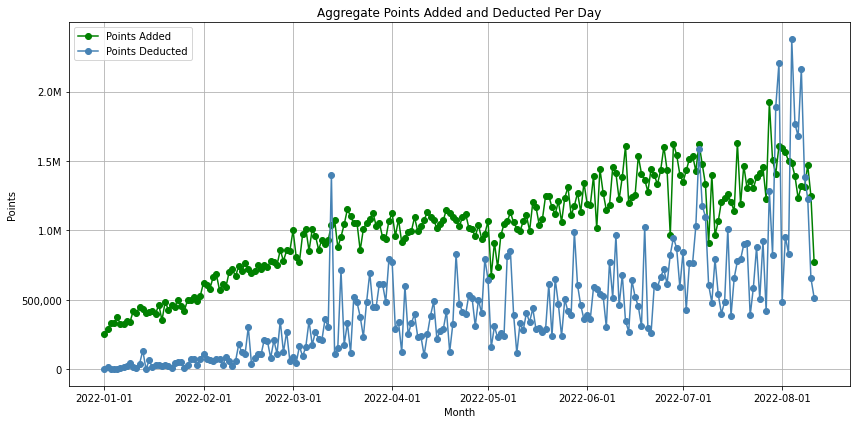

In [61]:
# Aggregate points added and deducted per day across all wallets
daily_points_added = wallet_day_by_day_df.groupby('day').agg({'points_added': 'sum'}).reset_index()
daily_points_deducted = wallet_day_by_day_df.groupby('day').agg({'points_deducted': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_points_added['day'], daily_points_added['points_added'], color='green', marker='o', label='Points Added')
plt.plot(daily_points_deducted['day'], daily_points_deducted['points_deducted'], color='#4682b4', marker='o', label='Points Deducted')


plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) if x < 1e6 else "{:.1f}M".format(x*1e-6)))

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Aggregate Points Added and Deducted Per Day')
plt.xlabel('Month')
plt.ylabel('Points')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The consistence increase of the added points indicates a high engagement level with the services or promotions that award points. Also, the inducted points suggests that the rewards are appealing or necessary for the users.

<a id='conc' style="font-size:25px; color:#1D2951; text-decoration:none"><b>Conclusion</b></a>

This analysis reveals 
- a clear consumer preference for specific SKUs like Gas 95, driving significant accumulated value and volume, which indicates key areas for strategic focus. 
- Seasonal trends emerge, with a spike in transactions during the summer, hinting at potential travel-related increases and opportunities for targeted marketing.
- A notable disparity in merchant performance within the redemption program underscores the need for re-evaluating merchant strategies. 
- Wallet analysis shows a strong inclination towards fuel transactions, with limited diversification in purchasing habits.
- Finally, the consistent engagement in the points system highlights its effectiveness in maintaining customer interest and loyalty, providing valuable insights for optimizing marketing and service strategies.